# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# Load Dataset & Explore
Dataset yang digunakan adalah [Honey Production in the USA (1998-2012)
](https://www.kaggle.com/jessicali9530/honey-production).

In [144]:
df = pd.read_csv('honeyproduction.csv')

df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [145]:
df.shape

(626, 8)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [147]:
df.duplicated().value_counts()

False    626
dtype: int64

<AxesSubplot:ylabel='totalprod'>

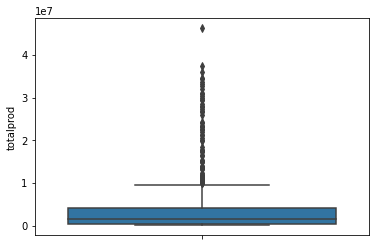

In [148]:
sns.boxplot(data=df, y='totalprod')

In [149]:
q1, q3 = df.totalprod.quantile(0.25), df.totalprod.quantile(0.75)
iqr = q3-q1

df = df[df.totalprod < (q3 + (1.5*iqr))]

<AxesSubplot:ylabel='totalprod'>

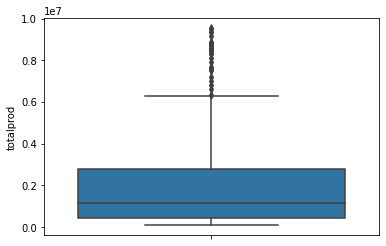

In [150]:
sns.boxplot(data=df, y='totalprod')

In [151]:
df.shape

(551, 8)

In [152]:
df.corr()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
numcol,1.000000,0.158312,0.945387,0.760725,-0.311629,0.878071,0.000793
yieldpercol,0.158312,1.000000,0.383008,0.297162,-0.310282,0.263607,-0.193309
totalprod,0.945387,0.383008,1.000000,0.801379,-0.353532,0.881333,-0.075423
stocks,0.760725,0.297162,0.801379,1.000000,-0.378627,0.628888,-0.169440
priceperlb,-0.311629,-0.310282,-0.353532,-0.378627,1.000000,-0.060334,0.695697
prodvalue,0.878071,0.263607,0.881333,0.628888,-0.060334,1.000000,0.221368
year,0.000793,-0.193309,-0.075423,-0.169440,0.695697,0.221368,1.000000


<AxesSubplot:>

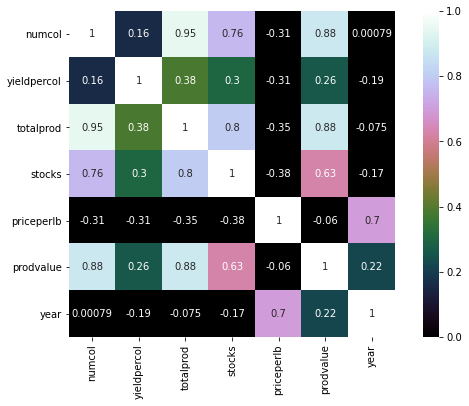

In [153]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix', square=True, vmin=0, vmax=1)

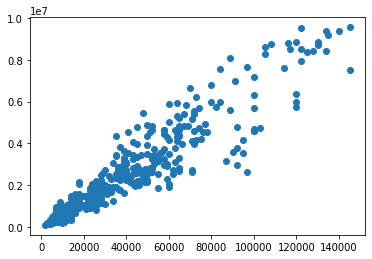

In [154]:
plt.plot(df.numcol, df.totalprod, 'o')

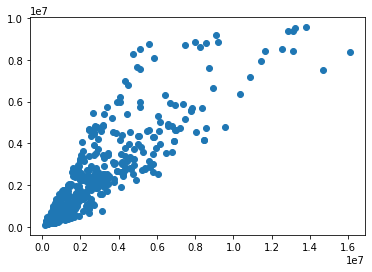

In [155]:
plt.plot(df.prodvalue, df.totalprod, 'o')

# Linear Regression

In [156]:
x = df.numcol.values.reshape(-1, 1)
y = df.totalprod

In [157]:
regr = LinearRegression()
regr.fit(x, y)

LinearRegression()

In [158]:
regr.coef_, regr.intercept_

(array([64.18915428]), -47509.40844410914)

In [159]:
y_pred = regr.predict(x)

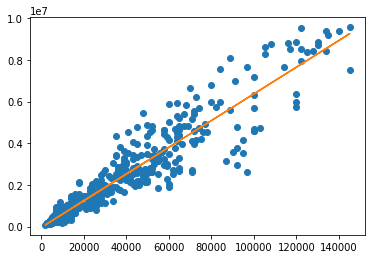

In [160]:
plt.plot(x, y, 'o')
plt.plot(x, y_pred)
plt.show()

## Evaluation

### MSE

In [161]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

462235459227.96484

### MAE

In [162]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, y_pred)

420762.6311862607

### R² Score

In [163]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.8937565087069161

In [164]:
comp = pd.DataFrame({'actual':y,'predict':y_pred})
comp.predict = round(comp.predict)
comp.head(10)

,actual,predict
0,1136000.0,979517.0
1,3300000.0,3482894.0
2,3445000.0,3354516.0
4,1944000.0,1685598.0
6,4200000.0,4766677.0
7,944000.0,466004.0
8,6000000.0,7655189.0
9,639000.0,530193.0
10,828000.0,530193.0
11,3900000.0,3161948.0


# Multiple Linear Regression

In [165]:
x = df[['numcol', 'stocks', 'prodvalue']]
y = df.totalprod

In [185]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [186]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [187]:
y_pred = mlr.predict(x_test)

## Evaluation

### MSE

In [188]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

298569145092.9764

### MAE

In [189]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

334081.49257369945

### R² Score

In [190]:
print(f"Train score: {mlr.score(x_train, y_train)}")
print(f"Test score: {mlr.score(x_test, y_test)}")

Train score: 0.9242927244883906
Test score: 0.9275703931481802


In [191]:
comp = pd.DataFrame({'actual':y_test,'predict':y_pred})
comp.predict = round(comp.predict)
comp.head(10)

,actual,predict
621,164000.0,227958.0
94,4700000.0,5480092.0
162,280000.0,264077.0
92,3135000.0,2550240.0
311,680000.0,723568.0
261,1044000.0,851541.0
488,352000.0,552261.0
455,1104000.0,1322549.0
95,488000.0,424209.0
349,4662000.0,3886456.0


# Logistic Regression

In [120]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
6,GA,75000.0,56,4200000.0,307000.0,0.69,2898000.0,1998


In [121]:
group_names = ['Little', 'Medium', 'Lot']
bins = np.linspace(min(df.totalprod), max(df.totalprod), 4)
bins

array([  84000., 3246000., 6408000., 9570000.])

In [122]:
df['prod_category'] = pd.cut(df.totalprod, bins, labels=group_names, include_lowest=True)

df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,prod_category
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998,Little
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998,Medium
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998,Medium
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998,Little
6,GA,75000.0,56,4200000.0,307000.0,0.69,2898000.0,1998,Medium


In [123]:
df.prod_category.value_counts()

Little    436
Medium     88
Lot        27
Name: prod_category, dtype: int64

In [124]:
x = df[['numcol', 'stocks', 'prodvalue']]
y = df.iloc[:,-1]

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [139]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [140]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

In [141]:
y_pred = clf.predict(x_test)

<AxesSubplot:>

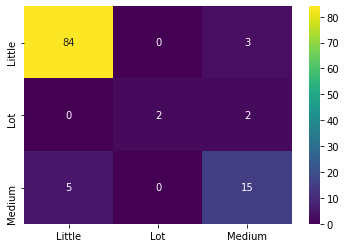

In [142]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot = True,
    xticklabels=sorted(group_names),
    yticklabels=sorted(group_names),
    cmap='viridis'
)

## Evaluation

In [143]:
print(f"Train score: {clf.score(x_train, y_train)}")
print(f"Test score: {clf.score(x_test, y_test)}")

Train score: 0.9295454545454546
Test score: 0.9099099099099099


In [131]:
print(f"(Precision, Recall, F1 Score): {precision_recall_fscore_support(y_test, y_pred, average='macro')[:-1]}")

(Precision, Recall, F1 Score): (0.8756704980842912, 0.7516795865633075, 0.7656482246077623)
